# Filtering recession probability using Bernoulli draws

Denote $\theta$ the probability of a recession in a given quarter, and assume that recessions are iid. The agent does not know $\theta $ but updates beliefs about $\theta $ based
on observed realizations of recessions, in the form of a dummy variable $y_{t}$ that equals one when the economy is in a recession. Recessions are therefore Bernoulli distributed random variables with parameter $\theta$.

Assume that the prior $p\left( \theta \right) $ that the agent has is Beta
distributed with positive parameters $\alpha _{0}$ and $\beta _{0}$

\begin{equation*}
\theta \sim Beta\left( \alpha _{0},\beta _{0}\right) .
\end{equation*}

This prior implies the density $p\left( \theta \right) $ given by

\begin{equation*}
p\left( \theta \right) =\frac{\theta ^{a_{0}-1}\left( 1-\theta \right)
^{\beta _{0}-1}}{B\left( \alpha _{0},\beta _{0}\right) }\qquad \theta \in
\left( 0,1\right) .
\end{equation*}

For example, for $\alpha _{0}=\beta _{0}=1$, we obtain a uniform prior.

Using Bayes law, we can derive a recursive formula for the posterior $p\left(
\theta |y^{t}\right) $ where $y^{t}=\left( y_{1},\ldots ,y_{t}\right) $. We have

\begin{align}
p\left( \theta |y^{t}\right)  &= p\left( \theta |y_{t},y^{t-1}\right) =\frac{%
p\left( \theta ,y_{t}|y^{t-1}\right) }{p\left( y_{t}|y^{t-1}\right) } \\
&=\frac{p\left( y_{t}|\theta ,y^{t-1}\right) p\left( \theta |y^{t-1}\right)
}{p\left( y_{t}|y^{t-1}\right) }=\frac{p\left( y_{t}|\theta \right) p\left(
\theta |y^{t-1}\right) }{p\left( y_{t}|y^{t-1}\right) }
\end{align}

We are interested in the
distribution of $\theta $, and since the denominator of the last expression
does not depend on $\theta $, it is merely a normalization constant and we
can look at the numerator. Assume that $p\left( \theta |y^{t-1}\right) $ is
Beta distributed with parameters $\alpha _{t-1}$ and $\beta _{t-1}$. Then
the numerator for the case when $y_{1}=1$ is equal to

\begin{equation*}
p\left( y_{t}=1|\theta \right) p\left( \theta |y^{t-1}\right) =\underset{%
p\left( y_{t}=1|\theta \right) }{\underbrace{\theta }}\frac{\theta
^{a_{t-1}-1}\left( 1-\theta \right) ^{\beta _{t-1}-1}}{B\left( \alpha
_{t-1},\beta _{t-1}\right) }=\frac{\theta ^{\left( a_{t-1}+1\right)
-1}\left( 1-\theta \right) ^{\beta _{t-1}-1}}{B\left( \alpha _{t-1},\beta
_{t-1}\right) }
\end{equation*}

On the contrary

\begin{equation*}
p\left( y_{t}=0|\theta \right) p\left( \theta |y^{t-1}\right) =\underset{%
p\left( y_{t}=0|\theta \right) }{\underbrace{\left( 1-\theta \right) }}\frac{%
\theta ^{a_{t-1}-1}\left( 1-\theta \right) ^{\beta _{t-1}-1}}{B\left( \alpha
_{t-1},\beta _{t-1}\right) }=\frac{\theta ^{a_{t-1}-1}\left( 1-\theta
\right) ^{\left( \beta _{t-1}+1\right) -1}}{B\left( \alpha _{t-1},\beta
_{t-1}\right) }
\end{equation*}

The denominators $p\left( y_{t}|y^{t-1}\right) $ and $B\left( \alpha
_{t-1},\beta _{t-1}\right) $ are only normalizations constants. Combining
both these cases, we can conclude that

\begin{equation*}
p\left( \theta |y^{t}\right) =\frac{p\left( y_{t}|\theta \right) p\left(
\theta |y^{t-1}\right) }{p\left( y_{t}|y^{t-1}\right) }=\frac{\theta
^{\left( a_{t-1}+y_{t}\right) -1}\left( 1-\theta \right) ^{\left( \beta
_{t-1}+1-y_{t}\right) -1}}{B\left( \alpha _{t-1}+y_{t},\beta
_{t-1}+1-y_{t}\right) }=\frac{\theta ^{\alpha _{t}-1}\left( 1-\theta \right)
^{\beta _{t}-1}}{B\left( \alpha _{t},\beta _{t}\right) }
\end{equation*}

where

\begin{align}
\alpha _{t} &=&\alpha _{t-1}+y_{t} \\
\beta _{t} &=&\beta _{t-1}+1-y_{t}.
\end{align}

The posterior mean and variance are

\begin{equation*}
E\left[ \theta |y^{t}\right] =\frac{\alpha _{t}}{\alpha _{t}+\beta _{t}}%
\qquad Var\left[ \theta |y^{t}\right] =\frac{\alpha _{t}\beta _{t}}{\left(
\alpha _{t}+\beta _{t}\right) ^{2}\left( \alpha _{t}+\beta _{t}+1\right) }.
\end{equation*}

## Implementation

Define the local folder where graphs will be stored, and from which data will be retrieved. If you are running the notebook within Google Colab, use the second option.

In [1]:
graphfolder = "graphs/"
datafolder = "data/"

# options for Google Colab (uncomment the following lines)
# graphfolder = "gdrive/MyDrive/graphs/"
# datafolder = "gdrive/MyDrive/data/"

Import relevant packages.

In [2]:
# render graphs within notebook
%matplotlib inline

# import packages
import numpy as np

# load econutil package with some frequently used functions
import econutil as ec

Root package econutil imported.


In [3]:
# create a vector of recession dummies using a pre-defined function CreateRecessionDummies, with data downloaded from the NBER website
Tint = [18551,20231]
rec_dates,rec_dummies = ec.CreateRecessionDummies(Tint)
T = len(rec_dates)

# create the vector of posteriors
alph, bet = np.zeros(T+1), np.zeros(T+1)
alph[0], bet[0] = 1, 1

# sequential updating
for t in range(T):
    alph[t+1] = alph[t] + rec_dummies[t]
    bet[t+1] = bet[t] + 1 - rec_dummies[t]
    
rec_p_mean = alph / (alph + bet)
rec_p_var = alph*bet / ((alph+bet)**2 * (alph+bet+1))

Plot mean and variance of the posterior distribution.

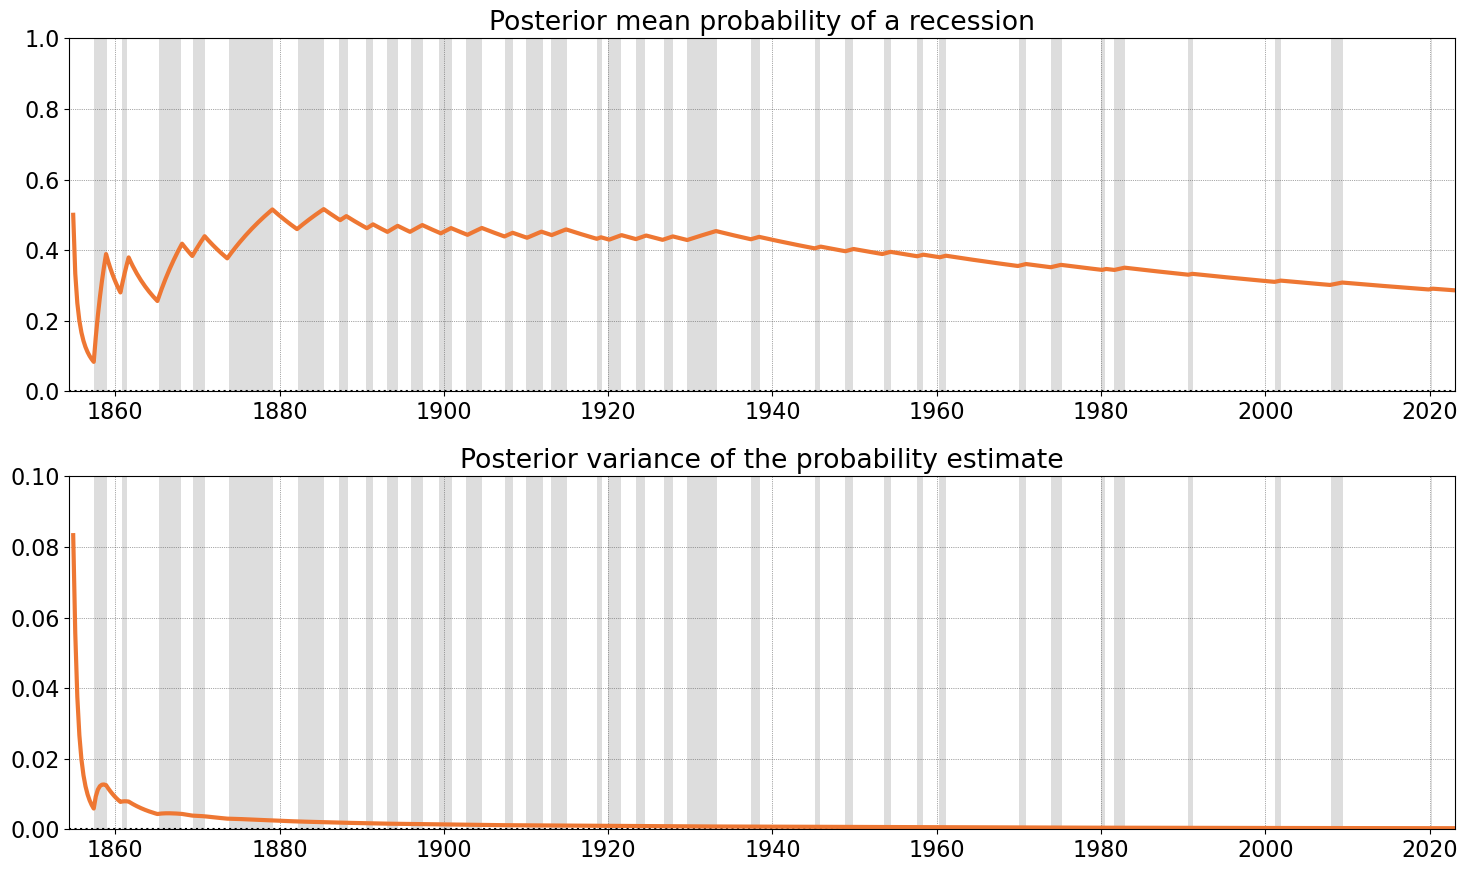

In [4]:
Tyearint = [Tint[0]//10+(Tint[0]%10-1.5)/4,Tint[1]//10+(Tint[1]%10-0.5)/4]
fig_param = {'figsize' : [15,9], 'fontsize': 16, 'subplots': [2,1],
         'title': 'Posterior mean probability of a recession',
         'xlim': [Tyearint[0]-0.5,Tyearint[1]], 'ylim': [0,1],
         'xlabel': '', 'ylabel': '',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions' : True, 'showNBERrecessions_y': [-30,30]}
    
fig,ax = ec.GenerateTSPlot(fig_param)

ax[0,0].plot(np.linspace(Tyearint[0],Tyearint[1],T+1),rec_p_mean,
             linewidth=3,color=ec.tolColor['tolVibrantOrange'],label='Mkt')

ax[1,0].plot(np.linspace(Tyearint[0],Tyearint[1],T+1),rec_p_var,
             linewidth=3,color=ec.tolColor['tolVibrantOrange'],label='Mkt')
ax[1,0].set_ylim([0,0.1])
ax[1,0].set_title('Posterior variance of the probability estimate')

fig.tight_layout()
fig.savefig(graphfolder + '/filtering_recessions_bernoulli.pdf',bbox_inches='tight')